# Non Graded Challenge 11

# Descriptive

Nama : Raditya Saputra

Batch : 007 FTDS

# Soal : 
- Cari Measure of Central Tendency dari data 'covid_19_Indonesia_time_series_all.csv'
- Cari Measure of Variance dari data 'covid_19_Indonesia_time_series_all.csv'

# Library yang digunakan :

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
import sklearn

# Load data

In [2]:
df_covid = pd.read_csv('covid_19_Indonesia_time_series_all.csv')

In [3]:
# menampilkan seluruh kolom data
pd.set_option('display.max_columns', None)

In [4]:
df_covid.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,City or Regency,Province,Country,Continent,Island,Time Zone,Special Status,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,41,-22,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,105.13%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,41,-20,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,100.00%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,2,Country,NaN,NaN,Indonesia,Asia,NaN,NaN,NaN,416,98.0,7230,8488.0,74953.0,1916907,265185520,138.34,113.921327,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,2,0,3,-1,Province,NaN,Riau,Indonesia,Asia,Sumatera,UTC+07:00,NaN,10,2.0,169,268.0,1591.0,87024,6074100,69.80,101.805109,0.511648,0.16,0.33,0.0,0.00,0.00,0.00%,150.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,41,-18,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,95.35%,1.0,1.0


In [5]:
# menampilkan seluruh tipe data
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21759 entries, 0 to 21758
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         21759 non-null  object 
 1   Location ISO Code            21759 non-null  object 
 2   Location                     21759 non-null  object 
 3   New Cases                    21759 non-null  int64  
 4   New Deaths                   21759 non-null  int64  
 5   New Recovered                21759 non-null  int64  
 6   New Active Cases             21759 non-null  int64  
 7   Total Cases                  21759 non-null  int64  
 8   Total Deaths                 21759 non-null  int64  
 9   Total Recovered              21759 non-null  int64  
 10  Total Active Cases           21759 non-null  int64  
 11  Location Level               21759 non-null  object 
 12  City or Regency              0 non-null      float64
 13  Province        

In [6]:
# pengecheckan missing value
df_covid.isnull().sum()

Date                               0
Location ISO Code                  0
Location                           0
New Cases                          0
New Deaths                         0
New Recovered                      0
New Active Cases                   0
Total Cases                        0
Total Deaths                       0
Total Recovered                    0
Total Active Cases                 0
Location Level                     0
City or Regency                21759
Province                         642
Country                            0
Continent                          0
Island                           642
Time Zone                        642
Special Status                 18636
Total Regencies                    0
Total Cities                     614
Total Districts                    0
Total Urban Villages             617
Total Rural Villages             642
Area (km2)                         0
Population                         0
Population Density                 0
L

# Data cleaning & eksplorasi data

- Meliputi : mengubah tipe data, mengisi data yang kosong, menghapus kolom data yang tidak diperlukan dan mengisi data menggunakan nilai median
- sebelum dilakukan alangkah baiknya merekap data original

In [7]:
covid_19 = df_covid.copy()

In [8]:
# mengubah data tipe date menjadi datetime
covid_19['Date'] = pd.to_datetime(covid_19['Date'])

# Pengecheckan data pada kolom special status untuk di handling

In [9]:
covid_19[
    (covid_19['Special Status'] == 'Daerah Istimewa')
].groupby(['Location']).count()

,Date,Location ISO Code,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,City or Regency,Province,Country,Continent,Island,Time Zone,Special Status,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
Location,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Daerah Istimewa Yogyakarta,627,627,627,627,627,627,627,627,627,627,627,0,627,627,627,627,627,627,627,627,627,627,627,627,627,627,627,627,627,627,627,627,627,627,627,613,575


In [10]:
covid_19[
    (covid_19['Special Status'] == 'Daerah Khusus')
].groupby(['Location']).count()

,Date,Location ISO Code,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,City or Regency,Province,Country,Continent,Island,Time Zone,Special Status,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
Location,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aceh,617,617,617,617,617,617,617,617,617,617,617,0,617,617,617,617,617,617,617,617,617,0,617,617,617,617,617,617,617,617,617,617,617,617,617,585,557
Papua,621,621,621,621,621,621,621,621,621,621,621,0,621,621,621,621,621,621,621,621,621,621,621,621,621,621,621,621,621,621,621,621,621,621,621,577,519
Papua Barat,616,616,616,616,616,616,616,616,616,616,616,0,616,616,616,616,616,616,616,616,616,616,616,616,616,616,616,616,616,616,616,616,616,616,616,582,526


In [11]:
covid_19[
    (covid_19["Special Status"] == "Daerah Khusus Ibu Kota")
].groupby(["Location"]).count()

,Date,Location ISO Code,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,City or Regency,Province,Country,Continent,Island,Time Zone,Special Status,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
Location,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
DKI Jakarta,642,642,642,642,642,642,642,642,642,642,642,0,642,642,642,642,642,642,642,642,642,642,0,642,642,642,642,642,642,642,642,642,642,642,642,639,603


In [12]:
# mengisi data yang missing pada kolom special status menjadi daerah
covid_19['Special Status'].fillna(
    value='Daerah',
    inplace=True
)

In [13]:
# menghapus kolom yang tidak diperlukan
hapus_kolom = ['City or Regency']
# kolom City or Regency dihapus dikarenakan seluruh baris kosong
covid_19.drop(hapus_kolom, inplace=True, axis=1)

In [14]:
covid_19.isnull().sum()

Date                              0
Location ISO Code                 0
Location                          0
New Cases                         0
New Deaths                        0
New Recovered                     0
New Active Cases                  0
Total Cases                       0
Total Deaths                      0
Total Recovered                   0
Total Active Cases                0
Location Level                    0
Province                        642
Country                           0
Continent                         0
Island                          642
Time Zone                       642
Special Status                    0
Total Regencies                   0
Total Cities                    614
Total Districts                   0
Total Urban Villages            617
Total Rural Villages            642
Area (km2)                        0
Population                        0
Population Density                0
Longitude                         0
Latitude                    

# Pengecheckan data pada kolom :
- Total Cities 
- Total Urban Villages
- Total Rural Villages
- Growth Factor of New Cases
- Growth Factor of New Deaths menggunakan visualisasi skew

Skewness value :  5.301231324844777


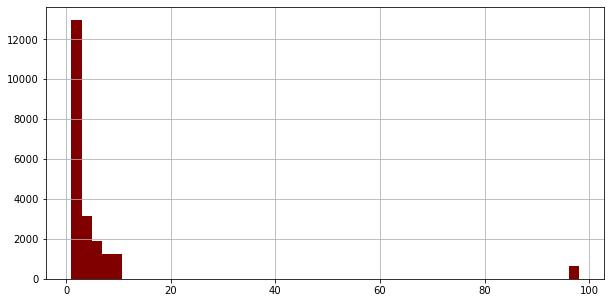

In [15]:
# Feature : Total Cities

print('Skewness value : ', covid_19['Total Cities'].skew())
covid_19['Total Cities'].hist(bins=50, figsize=(10,5), color='maroon')
plt.show()

Skewness value :  5.273222829016077


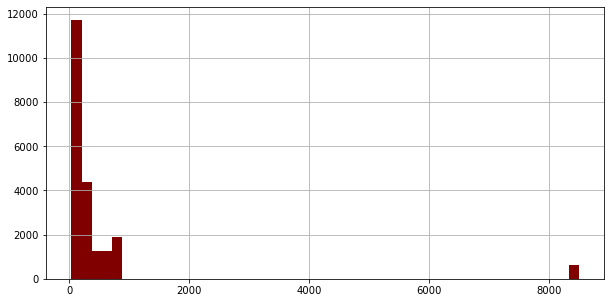

In [16]:
# Feature : Total Urban Villages

print('Skewness value : ', covid_19['Total Urban Villages'].skew())
covid_19['Total Urban Villages'].hist(bins=50, figsize=(10,5), color='maroon')
plt.show()

Skewness value :  5.24528239049064


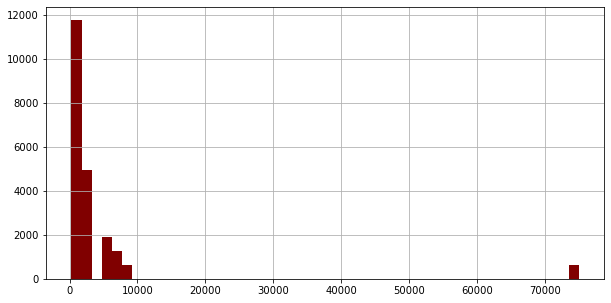

In [17]:
# Feature : Total Rural Villages

print('Skewness value : ', covid_19['Total Rural Villages'].skew())
covid_19['Total Rural Villages'].hist(bins=50, figsize=(10,5), color='maroon')
plt.show()

Skewness value :  21.476447260384397


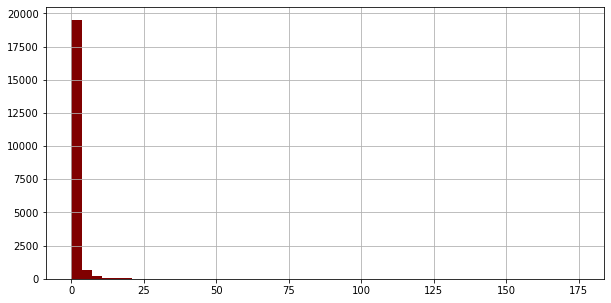

In [18]:
# Feature : Growth Factor of New Cases

print('Skewness value : ', covid_19['Growth Factor of New Cases'].skew())
covid_19['Growth Factor of New Cases'].hist(bins=50, figsize=(10,5), color='maroon')
plt.show()

Skewness value :  35.968545748713865


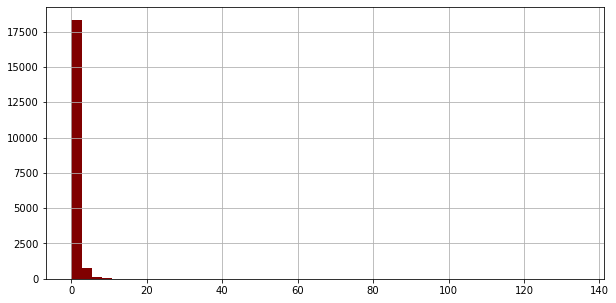

In [19]:
# Feature : Growth Factor of New Deaths

print('Skewness value : ', covid_19['Growth Factor of New Deaths'].skew())
covid_19['Growth Factor of New Deaths'].hist(bins=50, figsize=(10,5), color='maroon')
plt.show()

- Total Cities : right-skewed 
- Total Urban Villages : right-skewed
- Total Rural Villages : right-skewed 
- Growth Factor of New Cases : right-skewed
- Growth Factor of New Deaths : right-skewed

dari 5 data skew diatas, akan di handling menggunakan nilai median untuk mengisi missing valuenya

In [20]:
# Total Cities, Total Urban Villages, Total Rural Villages, Growth Factor of New Cases, Growth Factor of New Deaths

covid_19['Total Cities'] = covid_19['Total Cities'].fillna(covid_19['Total Cities'].median())
covid_19['Total Urban Villages'] = covid_19['Total Urban Villages'].fillna(covid_19['Total Urban Villages'].median())
covid_19['Total Rural Villages'] = covid_19['Total Rural Villages'].fillna(covid_19['Total Rural Villages'].median())
covid_19['Growth Factor of New Cases'] = covid_19['Growth Factor of New Cases'].fillna(covid_19['Growth Factor of New Cases'].median())
covid_19['Growth Factor of New Deaths'] = covid_19['Growth Factor of New Deaths'].fillna(covid_19['Growth Factor of New Deaths'].median())

In [21]:
covid_19.isnull().sum()

Date                             0
Location ISO Code                0
Location                         0
New Cases                        0
New Deaths                       0
New Recovered                    0
New Active Cases                 0
Total Cases                      0
Total Deaths                     0
Total Recovered                  0
Total Active Cases               0
Location Level                   0
Province                       642
Country                          0
Continent                        0
Island                         642
Time Zone                      642
Special Status                   0
Total Regencies                  0
Total Cities                     0
Total Districts                  0
Total Urban Villages             0
Total Rural Villages             0
Area (km2)                       0
Population                       0
Population Density               0
Longitude                        0
Latitude                         0
New Cases per Millio

missing value yang terakhir tinggal 3 kolom : Province, Island dan Time Zone akan dihandling menggunakan dropna saja. tidak menggunakan dropna (axis=1) dikarenakan missing value yang ada, disebabkan oleh kesalahan pada kolom location yang berisikan data 'Indonesia' 

In [22]:
# pengecheckan kolom location Indonesia
df_indo = df_covid[df_covid['Location'] == 'Indonesia']

In [23]:
df_indo

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,City or Regency,Province,Country,Continent,Island,Time Zone,Special Status,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,2,Country,NaN,NaN,Indonesia,Asia,NaN,NaN,NaN,416,98.0,7230,8488.0,74953.0,1916907,265185520,138.34,113.921327,-0.789275,0.01,0.01,0.00,0.00,0.00,0.00%,0.00%,NaN,NaN
5,3/3/2020,IDN,Indonesia,0,0,0,0,2,0,0,2,Country,NaN,NaN,Indonesia,Asia,NaN,NaN,NaN,416,98.0,7230,8488.0,74953.0,1916907,265185520,138.34,113.921327,-0.789275,0.00,0.01,0.00,0.00,0.00,0.00%,0.00%,0.00,1.00
9,3/4/2020,IDN,Indonesia,0,0,0,0,2,0,0,2,Country,NaN,NaN,Indonesia,Asia,NaN,NaN,NaN,416,98.0,7230,8488.0,74953.0,1916907,265185520,138.34,113.921327,-0.789275,0.00,0.01,0.00,0.00,0.00,0.00%,0.00%,1.00,1.00
13,3/5/2020,IDN,Indonesia,0,0,0,0,2,0,0,2,Country,NaN,NaN,Indonesia,Asia,NaN,NaN,NaN,416,98.0,7230,8488.0,74953.0,1916907,265185520,138.34,113.921327,-0.789275,0.00,0.01,0.00,0.00,0.00,0.00%,0.00%,1.00,1.00
18,3/6/2020,IDN,Indonesia,2,0,0,2,4,0,0,4,Country,NaN,NaN,Indonesia,Asia,NaN,NaN,NaN,416,98.0,7230,8488.0,74953.0,1916907,265185520,138.34,113.921327,-0.789275,0.01,0.02,0.00,0.00,0.00,0.00%,0.00%,NaN,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21637,11/29/2021,IDN,Indonesia,176,11,419,-254,4256112,143819,4104333,7960,Country,NaN,NaN,Indonesia,Asia,NaN,NaN,NaN,416,98.0,7230,8488.0,74953.0,1916907,265185520,138.34,113.921327,-0.789275,0.66,16049.56,0.04,542.33,54.23,3.38%,96.43%,0.67,11.00
21670,11/30/2021,IDN,Indonesia,297,11,324,-38,4256409,143830,4104657,7922,Country,NaN,NaN,Indonesia,Asia,NaN,NaN,NaN,416,98.0,7230,8488.0,74953.0,1916907,265185520,138.34,113.921327,-0.789275,1.12,16050.68,0.04,542.38,54.24,3.38%,96.43%,1.69,1.00
21703,12/1/2021,IDN,Indonesia,278,10,307,-39,4256687,143840,4104964,7883,Country,NaN,NaN,Indonesia,Asia,NaN,NaN,NaN,416,98.0,7230,8488.0,74953.0,1916907,265185520,138.34,113.921327,-0.789275,1.05,16051.73,0.04,542.41,54.24,3.38%,96.44%,0.94,0.91
21735,12/2/2021,IDN,Indonesia,311,10,388,-87,4256998,143850,4105352,7796,Country,NaN,NaN,Indonesia,Asia,NaN,NaN,NaN,416,98.0,7230,8488.0,74953.0,1916907,265185520,138.34,113.921327,-0.789275,1.17,16052.91,0.04,542.45,54.25,3.38%,96.44%,1.12,1.00


In [24]:
covid_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21759 entries, 0 to 21758
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         21759 non-null  datetime64[ns]
 1   Location ISO Code            21759 non-null  object        
 2   Location                     21759 non-null  object        
 3   New Cases                    21759 non-null  int64         
 4   New Deaths                   21759 non-null  int64         
 5   New Recovered                21759 non-null  int64         
 6   New Active Cases             21759 non-null  int64         
 7   Total Cases                  21759 non-null  int64         
 8   Total Deaths                 21759 non-null  int64         
 9   Total Recovered              21759 non-null  int64         
 10  Total Active Cases           21759 non-null  int64         
 11  Location Level               21759 non-nu

# Handling missing value terakhir dilakukan menghilangkan data Indonesia pada kolom Location

In [25]:
fix_clean = covid_19.dropna()

In [26]:
fix_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21117 entries, 0 to 21757
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         21117 non-null  datetime64[ns]
 1   Location ISO Code            21117 non-null  object        
 2   Location                     21117 non-null  object        
 3   New Cases                    21117 non-null  int64         
 4   New Deaths                   21117 non-null  int64         
 5   New Recovered                21117 non-null  int64         
 6   New Active Cases             21117 non-null  int64         
 7   Total Cases                  21117 non-null  int64         
 8   Total Deaths                 21117 non-null  int64         
 9   Total Recovered              21117 non-null  int64         
 10  Total Active Cases           21117 non-null  int64         
 11  Location Level               21117 non-nu

In [27]:
fix_clean[fix_clean['Location'] == 'Indonesia']

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,Province,Country,Continent,Island,Time Zone,Special Status,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths


# Menampilkan basic statistika data  

In [28]:
fix_clean.describe()

,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Growth Factor of New Cases,Growth Factor of New Deaths
count,21117.000000,21117.000000,21117.000000,21117.000000,21117.000000,21117.000000,21117.000000,21117.000000,21117.000000,21117.000000,21117.000000,21117.000000,21117.000000,21117.000000,2.111700e+04,21117.000000,21117.000000,21117.000000,21117.000000,21117.000000,21117.000000,21117.000000,21117.000000,21117.000000,21117.000000
mean,201.587063,6.809916,194.356679,0.420467,43853.423308,1367.888100,39467.440261,3018.094947,12.247526,2.959038,213.419946,256.403419,2259.993418,56345.861723,7.886560e+06,763.433178,113.673491,-2.790927,29.526409,6205.729824,0.852961,163.382238,16.338201,1.383996,1.065123
std,665.405748,26.523848,704.120572,432.896047,110094.277374,3727.119504,103545.209805,8044.884933,7.371116,2.359176,169.360732,220.577924,2070.913033,60153.377954,1.086073e+07,2782.528073,10.006227,3.646531,70.713936,10394.994690,2.299547,255.997940,25.599817,3.040495,1.504527
min,0.000000,0.000000,0.000000,-15797.000000,1.000000,0.000000,0.000000,-2306.000000,1.000000,1.000000,44.000000,35.000000,275.000000,664.000000,6.484070e+05,8.590000,96.910522,-8.682205,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,0.000000,4.000000,-15.000000,1685.000000,46.000000,949.000000,172.000000,7.000000,1.000000,103.000000,99.000000,928.000000,16787.000000,1.999539e+06,47.790000,106.109004,-6.204699,1.700000,413.320000,0.000000,10.600000,1.060000,0.670000,0.740000
50%,38.000000,1.000000,29.000000,0.000000,10245.000000,261.000000,8167.000000,849.000000,11.000000,2.000000,169.000000,175.000000,1591.000000,38744.000000,4.216171e+06,103.840000,112.732941,-2.993595,8.000000,2706.830000,0.160000,73.180000,7.320000,0.990000,1.000000
75%,133.000000,4.000000,126.000000,25.000000,34118.000000,949.000000,30240.000000,2398.000000,15.000000,4.000000,241.000000,327.000000,2435.000000,72981.000000,8.217551e+06,262.700000,121.201093,0.212037,26.300000,7364.180000,0.750000,195.470000,19.550000,1.300000,1.000000
max,14622.000000,544.000000,20602.000000,9537.000000,864045.000000,30225.000000,849875.000000,118018.000000,29.000000,9.000000,666.000000,792.000000,7809.000000,319036.000000,4.516132e+07,16334.310000,138.696030,4.225615,1348.130000,79663.790000,63.800000,1533.980000,153.400000,175.000000,134.500000


# Measure of Central Tendency

In [29]:
# Mean
print (fix_clean['Total Cities'].mean())

2.9590377421035186


In [30]:
# Median
print (fix_clean['Total Cities'].median())

2.0


In [31]:
# Mode
print (fix_clean['Total Cities'].mode())

0    2.0
dtype: float64


# Distribution and Density

In [32]:
print ('Min: ' + str(fix_clean['Total Cities'].min()))
print ('Mode: ' + str(fix_clean['Total Cities'].mode()[0]))
print ('Median: ' + str(fix_clean['Total Cities'].median()))
print ('Mean: ' + str(fix_clean['Total Cities'].mean()))
print ('Max: ' + str(fix_clean['Total Cities'].max()))

Min: 1.0
Mode: 2.0
Median: 2.0
Mean: 2.9590377421035186
Max: 9.0


# Hisotgram

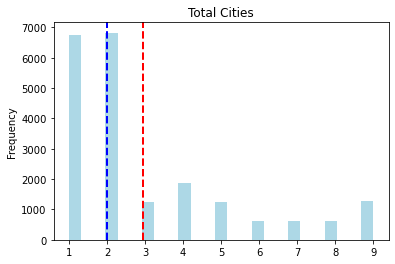

In [33]:
total_cities = fix_clean['Total Cities']
total_cities.plot.hist(title='Total Cities', color='lightblue', bins=25)  
plt.axvline(total_cities.mean(), color='red', linestyle='dashed', linewidth=2)
plt.axvline(total_cities.median(), color='blue', linestyle='dashed', linewidth=2)
plt.show()

- red line : mean dari total cities
- blue line : median dari total cities

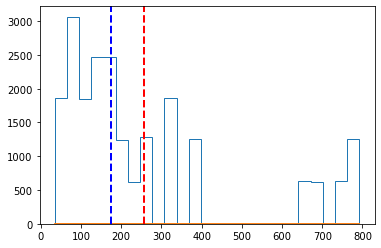

In [34]:
Total_Urban_Villages = fix_clean['Total Urban Villages']
density = stats.gaussian_kde(Total_Urban_Villages)
n, x, _ = plt.hist(Total_Urban_Villages, histtype='step', bins=25)  
plt.plot(x, density(x)*2**7.5)
plt.axvline(Total_Urban_Villages.mean(), color='red', linestyle='dashed', linewidth=2)
plt.axvline(Total_Urban_Villages.median(), color='blue', linestyle='dashed', linewidth=2)
plt.show()

- red line : mean dari total cities
- blue line : median dari total cities

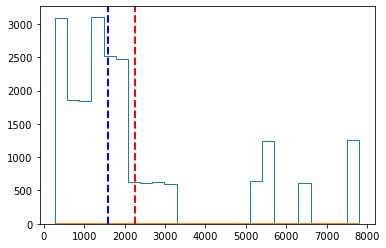

In [35]:
Total_Rural_Villages = fix_clean['Total Rural Villages']
density = stats.gaussian_kde(Total_Rural_Villages)
n, x, _ = plt.hist(Total_Rural_Villages, histtype='step', bins=25)  
plt.plot(x, density(x)*2**7.5)
plt.axvline(Total_Rural_Villages.mean(), color='red', linestyle='dashed', linewidth=2)
plt.axvline(Total_Rural_Villages.median(), color='blue', linestyle='dashed', linewidth=2)
plt.show()

- red line : mean dari total cities
- blue line : median dari total cities

# Skewness and Kurtosis

Total Cities skewness: 1.3475490581973597
Total Cities kurtosis: 0.7265035922317615


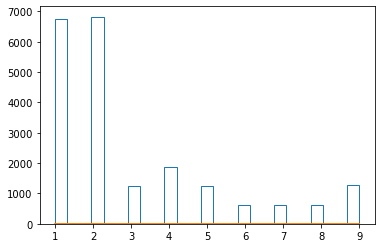



Total Urban Villages skewness: 1.355401816071507
Total Urban Villages kurtosis: 0.6453154852968739


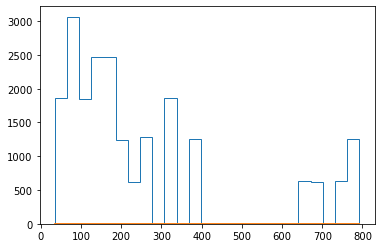



Total Rural Villages skewness: 1.4974812713959298
Total Rural Villages kurtosis: 1.1041675592019935


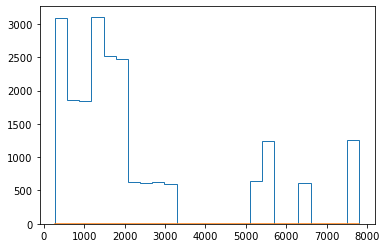

In [36]:
numcols = ['Total Cities', 'Total Urban Villages', 'Total Rural Villages']
for col in numcols:
    print(fix_clean[col].name + ' skewness: ' + str(fix_clean[col].skew()))
    print(fix_clean[col].name + ' kurtosis: ' + str(fix_clean[col].kurt()))
    density = stats.gaussian_kde(fix_clean[col])
    n, x, _ = plt.hist(fix_clean[col], histtype='step', bins=25)  
    plt.plot(x, density(x)*6)
    plt.show()
    print('\n')

# Measure of variance

# Range

In [37]:
numcols = ['Total Cities']
for col in numcols:
    print(fix_clean[col].name + ' range: ' + str(fix_clean[col].max() - fix_clean[col].min()))

Total Cities range: 8.0


# Persentil

In [38]:
print(stats.percentileofscore(fix_clean['Total Cities'], 5.0, 'strict'))

79.15423592366339


# Quartil

In [39]:
print(fix_clean['Total Cities'].quantile([0.25, 0.5, 0.75]))

0.25    1.0
0.50    2.0
0.75    4.0
Name: Total Cities, dtype: float64


# Box plot

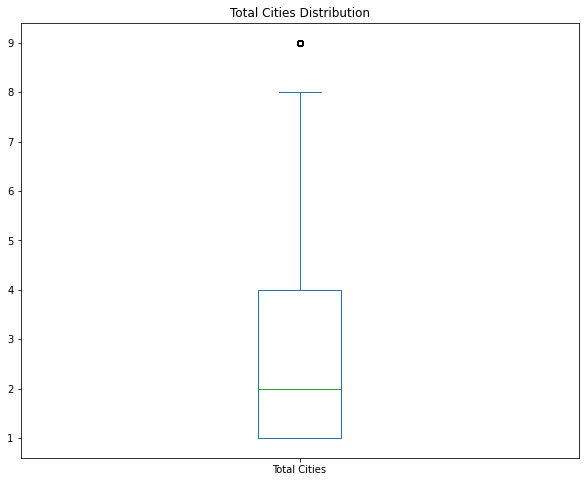

In [40]:
fix_clean['Total Cities'].plot(kind='box', title='Total Cities Distribution', figsize=(10,8))
plt.show()

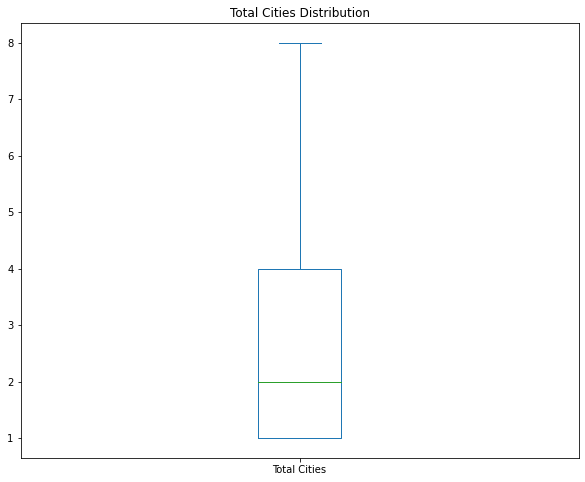

In [41]:
fix_clean['Total Cities'].plot(kind='box', title='Total Cities Distribution', figsize=(10,8), showfliers=False)
plt.show()

# Variance

In [42]:
print (fix_clean['Total Cities'].var())

5.565711671097085


# Standart Deviation

In [43]:
print (fix_clean['Total Cities'].std())

2.359176057672908
